In [2]:
#Importing the packags
# pip install --user -U nltk
# pip install -U scikit-learn

import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('bbc-text .csv', encoding = 'latin1',nrows = 1613)
df = df.sample(frac = 1)
df

,category,text
104,politics,howard pitches for uk ethnic vote michael howa...
217,sport,hewitt falls to dent in adelaide lleyton hewit...
1608,politics,final hunts held as ban looms hunts in england...
8,sport,wilkinson fit to face edinburgh england captai...
300,entertainment,stars pay tribute to actor davis hollywood sta...
...,...,...
245,sport,o connell rejects lions rumours ireland and mu...
1206,tech,speak easy plan for media players music and fi...
1125,business,parmalat founder offers apology the founder an...
1070,sport,holmes secures comeback victory britain s kell...


In [5]:
#No of a categories
len(set(df['category']))

5

In [6]:
df.groupby('category').category.count()

category
business         370
entertainment    291
politics         301
sport            365
tech             286
Name: category, dtype: int64

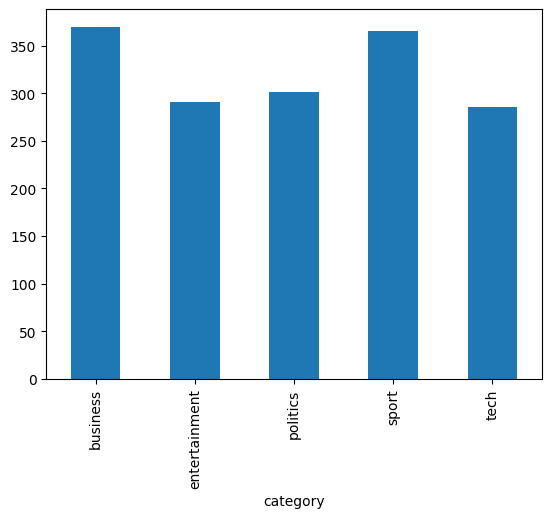

In [7]:
#Analyzing data
df.groupby('category').category.count().plot.bar()
plt.show()

In [8]:
#Data Preprocessing

In [9]:
# df['text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['text']]

In [10]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")
# data

'i am love comput'

In [12]:
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("I am loving computing")

'i am love comput'

In [13]:
# Data Cleaning removing stopwords

In [14]:
news = ''
data = "I am loving computing".lower().split()
for i in data:
  if i not in words:
    news = news + " " +i
news
  # print(i)

' loving computing'

In [15]:
df['text'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [16]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
df['text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['text']]
df['text'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), df['text']))
# df['text'] = [" ".join(word.split() for word in df['text'] if word.lower() not in stopwords.words('english'))]
df

,category,text
104,politics,howard pitches uk ethnic vote michael howard m...
217,sport,hewitt falls dent adelaide lleyton hewitt suff...
1608,politics,final hunts held ban looms hunts england wales...
8,sport,wilkinson fit face edinburgh england captain j...
300,entertainment,stars pay tribute actor davis hollywood stars ...
...,...,...
245,sport,connell rejects lions rumours ireland munster ...
1206,tech,speak easy plan media players music film fans ...
1125,business,parmalat founder offers apology founder former...
1070,sport,holmes secures comeback victory britain kelly ...


In [17]:
df.to_csv('cleaned_bbc_data.csv')

In [18]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
# df

In [19]:
# print(words)

In [20]:
# words = stopwords.words("nepali")
# words

In [21]:
df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
df

,category,text,cleaned
104,politics,howard pitches uk ethnic vote michael howard m...,howard pitch uk ethnic vote michael howard mak...
217,sport,hewitt falls dent adelaide lleyton hewitt suff...,hewitt fall dent adelaid lleyton hewitt suffer...
1608,politics,final hunts held ban looms hunts england wales...,final hunt held ban loom hunt england wale beg...
8,sport,wilkinson fit face edinburgh england captain j...,wilkinson fit face edinburgh england captain j...
300,entertainment,stars pay tribute actor davis hollywood stars ...,star pay tribut actor davi hollywood star incl...
...,...,...,...
245,sport,connell rejects lions rumours ireland munster ...,connel reject lion rumour ireland munster lock...
1206,tech,speak easy plan media players music film fans ...,speak easi plan media player music film fan ab...
1125,business,parmalat founder offers apology founder former...,parmalat founder offer apolog founder former b...
1070,sport,holmes secures comeback victory britain kelly ...,holm secur comeback victori britain kelli holm...


In [22]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['text']
Y = df['category'].astype('str')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset


# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression())])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

In [23]:
X_test

495     thousands join strike wales thousands civil se...
920     oscar nominees lack pulling power year clutch ...
520     fiat chief takes steering wheel chief executiv...
62      court rejects bn tobacco case us government cl...
463     dozens held id fraud site twenty eight people ...
                              ...                        
181     blogger grounded airline us airline attendant ...
838     spain coach faces racism inquiry spain footbal...
1560    china role yukos split china lent russia bn bn...
1440    nat insurance rise say tories national insuran...
1200    tv calls carroll error spurs boss martin jol s...
Name: text, Length: 242, dtype: object

In [24]:
y_test

495          politics
920     entertainment
520          business
62           business
463              tech
            ...      
181              tech
838             sport
1560         business
1440         politics
1200            sport
Name: category, Length: 242, dtype: object

In [25]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test)
# print(predict_news_cat)
print(accuracy_score(y_test,predict_news_cat))
# print('\n')
# print(predict_news_cat)

0.9586776859504132


In [26]:
file = open('/content/news.txt','r')
news = file.read()
file.close()

# news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)
news_data_df
predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

FileNotFoundError: [Errno 2] No such file or directory: '/content/news.txt'

In [27]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(ytest,model.predict(X_test)))

               precision    recall  f1-score   support

     business       0.94      0.98      0.96        59
entertainment       1.00      0.93      0.96        41
     politics       0.98      0.92      0.95        50
        sport       0.96      1.00      0.98        52
         tech       0.93      0.95      0.94        40

     accuracy                           0.96       242
    macro avg       0.96      0.96      0.96       242
 weighted avg       0.96      0.96      0.96       242

[[58  0  0  0  1]
 [ 1 38  1  0  1]
 [ 3  0 46  0  1]
 [ 0  0  0 52  0]
 [ 0  0  0  2 38]]


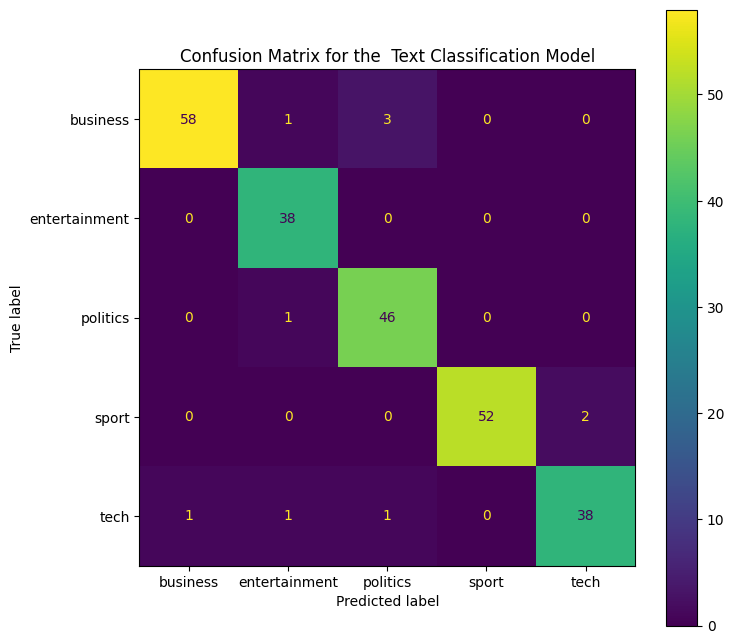

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),ytest)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['business','entertainment','politics','sport','tech']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Text Classification Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);